In [52]:
import ast
import pandas as pd

def convert_to_list(s):
    return ast.literal_eval(s)

# DataFrameの読み込み
df = pd.read_csv('../results/output.csv', converters={'num_iter_bins': convert_to_list})
df['bytes_per_character'] = df['memory_usage_cdawg'] / df['memory_usage_text']
df['edges_per_character'] = df['num_edges'] / df['text_length']
df['memory_usage_cdawg'] /= 1024.0
df['memory_usage_ma'] /= 1024.0
# df.set_index(['filename', 'text_length'], inplace=True)
df.drop(66, inplace=True)
df

,filename,text_length,num_vertices,num_edges,memory_usage_text,memory_usage_cdawg,memory_usage_ma,elapsed_time_lz78,num_iter_bins,bytes_per_character,edges_per_character
0,sources,8,4,10,8.0,0.167969,0.421875,0.0,"[0, 4, 4]",21.500000,1.250000
1,dna,8,4,8,8.0,0.144531,0.375000,0.0,"[0, 2, 4, 2]",18.500000,1.000000
2,english,8,6,12,8.0,0.214844,0.375000,0.0,"[0, 3, 1, 1, 1, 2]",27.500000,1.500000
3,sources,16,5,18,16.0,0.273438,0.750000,0.0,"[0, 10, 6]",17.500000,1.125000
4,dna,16,9,22,16.0,0.367188,0.562500,0.0,"[0, 1, 6, 9]",23.500000,1.375000
...,...,...,...,...,...,...,...,...,...,...,...
61,dna,8388608,4320560,11324449,8388608.0,183339.953125,39939.375000,6563.0,"[0, 0, 6, 13, 21, 17, 32, 44, 402, 12350, 1395...",22.380365,1.349980
62,english,8388608,1662446,5573005,8388608.0,84790.445312,57979.781250,7265.0,"[0, 6, 433, 6250, 41198, 158163, 409030, 76697...",10.350396,0.664354
63,sources,16777216,2563898,8602020,16777216.0,130850.605469,97005.750000,11448.0,"[0, 2, 447, 21339, 160789, 497792, 1020181, 16...",7.986487,0.512720
64,dna,16777216,8617280,22565128,16777216.0,365418.847656,76125.609375,14568.0,"[0, 0, 0, 38, 59, 50, 47, 68, 184, 5146, 10384...",22.303396,1.344986


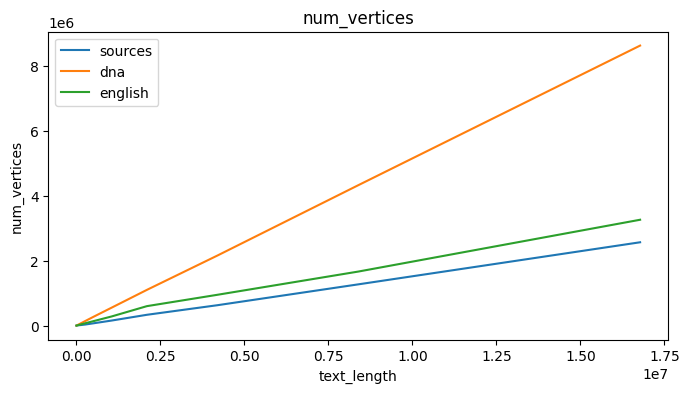

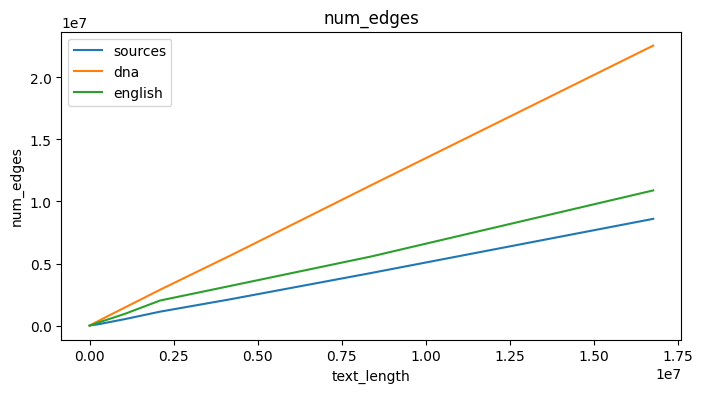

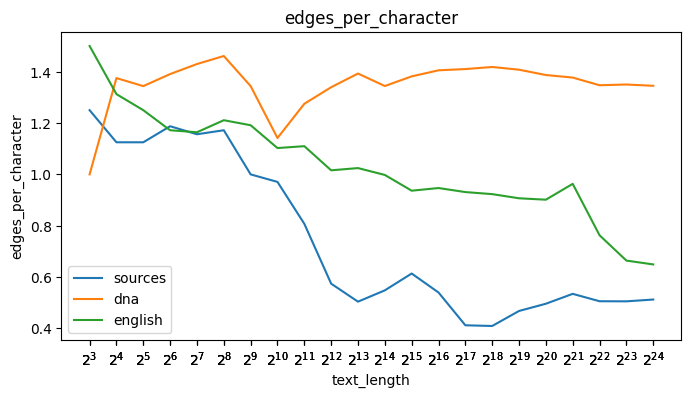

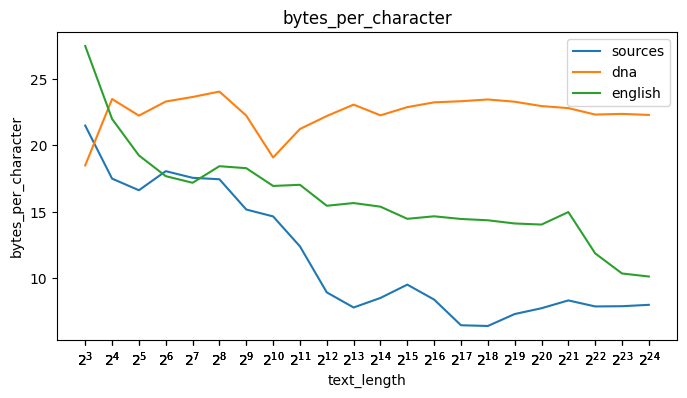

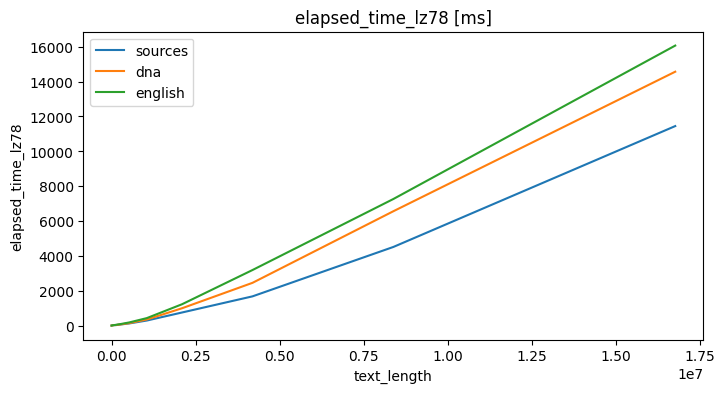

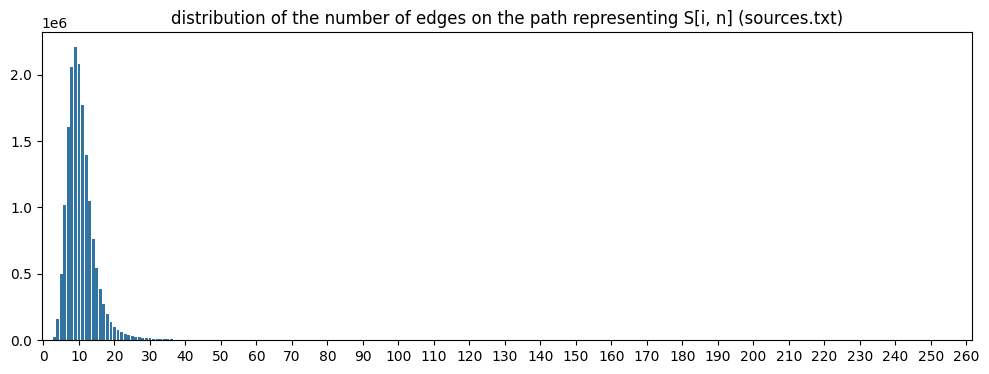

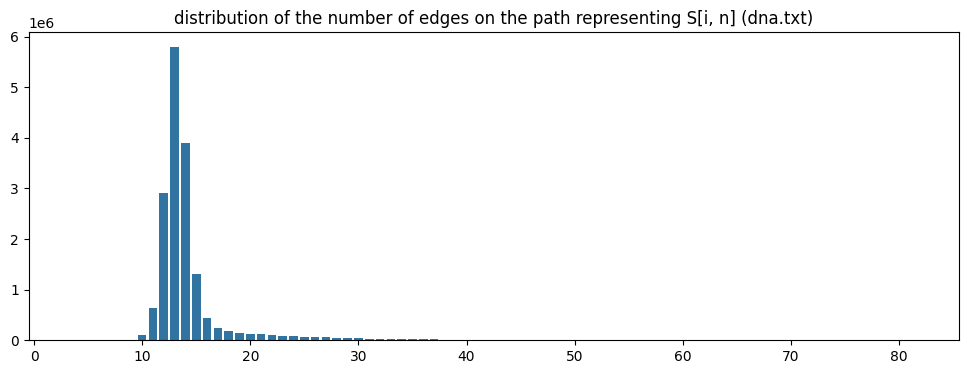

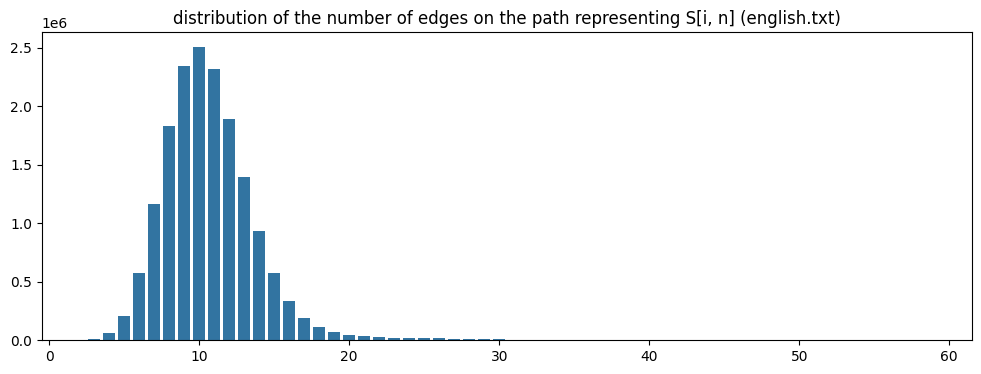

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter
import numpy as np


filenames = ['sources', 'dna', 'english']
lengths = [1 << x for x in range(3, 25)]


for label in ['num_vertices', 'num_edges', 'edges_per_character', 'bytes_per_character', 'elapsed_time_lz78']:
    fig, ax = plt.subplots(figsize=(8, 4))
    # for filename in filenames:
    sns.lineplot(df, x='text_length', y=label, hue='filename', ax=ax)
    if label.startswith('memory_usage'):
        ax.set_title(label + ' [kB]')
    if label.endswith('per_character'):
        ax.set_xscale('log', base=2)
        ax.set_xticks(df['text_length'])
        ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f"$2^{{{int(np.log2(x))}}}$"))
        ax.set_title(label + ' [bytes]')
    if label.startswith('elapsed_time_lz78'):
        ax.set_title(label + ' [ms]')
    else:
        ax.set_title(label)

    # handler, label = ax.get_legend_handles_labels()
    # ax.legend(handler, filenames)
    ax.legend()

df2 = df.set_index(['filename', 'text_length'])
for filename in filenames:
    fig, ax = plt.subplots(figsize=(12, 4))
    bin = df2.loc[filename, lengths[-1]]['num_iter_bins']
    sns.barplot(x=range(len(bin)), y=bin, ax=ax)
    step = 5  # 例えば、5個おきにラベルを表示
    ax.set_xticks(range(0, len(bin), 10))
    ax.set_xticklabels(range(0, len(bin), 10))
    ax.set_title(f'distribution of the number of edges on the path representing S[i, n] ({filename}.txt)')
    plt.show()